# Economic Data Analysis with Fred & Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)  # Correct key
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'c9e7e22f11aac2a8aa998e4a15eef023'

# 1. Create The Fred Object

In [2]:
fred = Fred(api_key = fred_key)

# 2. Search for economic data!

In [3]:
sp_search = fred.search('S&P', order_by='popularity')

sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-12-27   2024-12-27   
CSUSHPINSA          CSUSHPINSA     2024-12-27   2024-12-27   
SP500                    SP500     2024-12-27   2024-12-27   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-12-27   2024-12-27   
BAMLC0A0CM          BAMLC0A0CM     2024-12-27   2024-12-27   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
BAMLC0A0CM      ICE BofA US Corporate Index Option-Adjusted Sp...   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-12-26  Daily, Close   
CSUSHPINSA            1987-01-01      2024-09-01       Monthly   
SP500                 2014-12-29      2024-12-27  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2024-12-26  Daily, Close   
BAMLC0A0CM            1996-12-31      2024-12-26  Daily, Close   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
SP500                        D               Index               Index   
BAMLH0A0HYM2EY               D             Percent                   %   
BAMLC0A0CM                   D             Percent                   %   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
BAMLC0A0CM      Not Seasonally Adjusted                       NSA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2024-12-27 09:05:09-06:00         92   
CSUSHPINSA      2024-11-26 08:12:02-06:00         88   
SP500           2024-12-27 19:11:50-06:00         83   
BAMLH0A0HYM2EY  2024-12-27 09:05:12-06:00         82   
BAMLC0A0CM      2024-12-27 09:12:02-06:00         78   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
SP500           The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
BAMLC0A0CM      The ICE BofA Option-Adjusted Spreads (OASs) ar...

In [4]:
# fred gives max upto 1000 entries 
sp_search.shape

(1000, 15)

# 3. Pull Raw Data & Plot

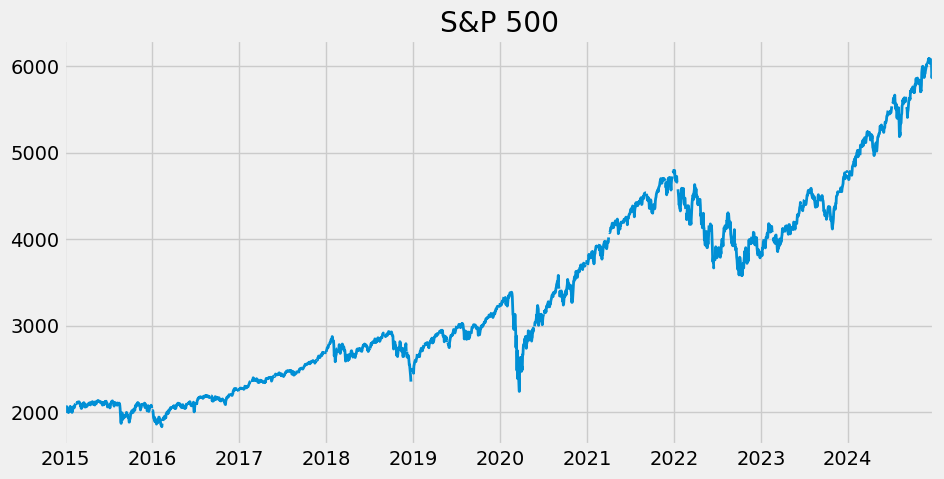

In [5]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

In [6]:
fred.get_series(series_id='SP500')

2014-12-29    2090.57
2014-12-30    2080.35
2014-12-31    2058.90
2015-01-01        NaN
2015-01-02    2058.20
               ...   
2024-12-23    5974.07
2024-12-24    6040.04
2024-12-25        NaN
2024-12-26    6037.59
2024-12-27    5970.84
Length: 2610, dtype: float64

# 4. Pull and Join Multiple Data Series

In [8]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-12-27   2024-12-27   
UNRATENSA      UNRATENSA     2024-12-27   2024-12-27   
LNS14000006  LNS14000006     2024-12-27   2024-12-27   
UNEMPLOY        UNEMPLOY     2024-12-27   2024-12-27   
LNU03000000  LNU03000000     2024-12-27   2024-12-27   
...                  ...            ...          ...   
INBART5URN    INBART5URN     2024-12-27   2024-12-27   
MOPRURN          MOPRURN     2024-12-27   2024-12-27   
PENS812UR      PENS812UR     2024-12-27   2024-12-27   
AKRO439UR      AKRO439UR     2024-12-27   2024-12-27   
PORT912UR      PORT912UR     2024-12-27   2024-12-27   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
LNS14000006      Unemployment Rate - Black or African American   
UNEMPLOY                                    Unemployment Level   
LNU03000000                                 Unemployment Level   
...                                                        ...   
INBART5URN         Unemployment Rate in Bartholomew County, IN   
MOPRURN                  Unemployment Rate in Perry County, MO   
PENS812UR    Unemployment Rate in Pensacola-Ferry Pass-Bren...   
AKRO439UR                 Unemployment Rate in Akron, OH (MSA)   
PORT912UR        Unemployment Rate in Port St. Lucie, FL (MSA)   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2024-11-01   Monthly               M   
UNRATENSA          1948-01-01      2024-11-01   Monthly               M   
LNS14000006        1972-01-01      2024-11-01   Monthly               M   
UNEMPLOY           1948-01-01      2024-11-01   Monthly               M   
LNU03000000        1948-01-01      2024-11-01   Monthly               M   
...                       ...             ...       ...             ...   
INBART5URN         1990-01-01      2024-10-01   Monthly               M   
MOPRURN            1990-01-01      2024-10-01   Monthly               M   
PENS812UR          1990-01-01      2024-10-01   Monthly               M   
AKRO439UR          1990-01-01      2024-10-01   Monthly               M   
PORT912UR          1990-01-01      2024-10-01   Monthly               M   

                            units        units_short  \
series id                                              
UNRATE                    Percent                  %   
UNRATENSA                 Percent                  %   
LNS14000006               Percent                  %   
UNEMPLOY     Thousands of Persons  Thous. of Persons   
LNU03000000  Thousands of Persons  Thous. of Persons   
...                           ...                ...   
INBART5URN                Percent                  %   
MOPRURN                   Percent                  %   
PENS812UR                 Percent                  %   
AKRO439UR                 Percent                  %   
PORT912UR                 Percent                  %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
UNRATE                Seasonally Adjusted                        SA   
UNRATENSA         Not Seasonally Adjusted                       NSA   
LNS14000006           Seasonally Adjusted                        SA   
UNEMPLOY              Seasonally Adjusted                        SA   
LNU03000000       Not Seasonally Adjusted                       NSA   
...                                   ...                       ...   
INBART5URN        Not Seasonally Adjusted                       NSA   
MOPRURN           Not Seasonally Adjusted                       NSA   
PENS812UR    Smooth

In [9]:
unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-07-01    4.3
2024-08-01    4.2
2024-09-01    4.1
2024-10-01    4.1
2024-11-01    4.2
Length: 923, dtype: float64

<Axes: >

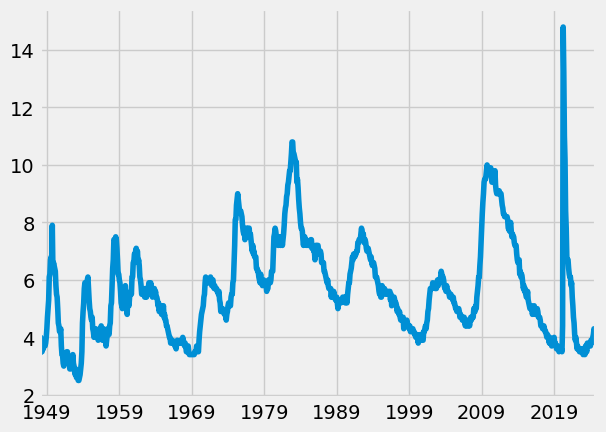

In [10]:
unrate.plot()

# When covid-19 hit the unemployment rate was at its peak many lost their jobs

In [11]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df

id realtime_start realtime_end  \
series id                                                            
UNRATE                          UNRATE     2024-12-27   2024-12-27   
LNS14000006                LNS14000006     2024-12-27   2024-12-27   
U6RATE                          U6RATE     2024-12-27   2024-12-27   
CAUR                              CAUR     2024-12-27   2024-12-27   
TXUR                              TXUR     2024-12-27   2024-12-27   
...                                ...            ...          ...   
M08311USM156SNBR      M08311USM156SNBR     2024-12-27   2024-12-27   
LNS13008397                LNS13008397     2024-12-27   2024-12-27   
LBSSA20                        LBSSA20     2024-12-27   2024-12-27   
LNS14000150                LNS14000150     2024-12-27   2024-12-27   
NEIPTERM156SFRBRIC  NEIPTERM156SFRBRIC     2024-12-27   2024-12-27   

                                                                title  \
series id                                                               
UNRATE                                              Unemployment Rate   
LNS14000006             Unemployment Rate - Black or African American   
U6RATE              Total Unemployed, Plus All Persons Marginally ...   
CAUR                                  Unemployment Rate in California   
TXUR                                       Unemployment Rate in Texas   
...                                                               ...   
M08311USM156SNBR    Unemployment Rate, Married Males, Spouse Prese...   
LNS13008397         Of Total Unemployed, Percent Unemployed Less T...   
LBSSA20                     Labor Force Participation Rate for Kansas   
LNS14000150                           Unemployment Rate - Married Men   
NEIPTERM156SFRBRIC  Hornstein-Kudlyak-Lange Non-Employment Index i...   

                   observation_start observation_end frequency  \
series id                                                        
UNRATE                    1948-01-01      2024-11-01   Monthly   
LNS14000006               1972-01-01      2024-11-01   Monthly   
U6RATE                    1994-01-01      2024-11-01   Monthly   
CAUR                      1976-01-01      2024-11-01   Monthly   
TXUR                      1976-01-01      2024-11-01   Monthly   
...                              ...             ...       ...   
M08311USM156SNBR          1954-11-01      1968-01-01   Monthly   
LNS13008397               1948-01-01      2024-11-01   Monthly   
LBSSA20                   1976-01-01      2024-11-01   Monthly   
LNS14000150               1955-01-01      2024-11-01   Monthly   
NEIPTERM156SFRBRIC        1994-01-01      2024-11-01   Monthly   

                   frequency_short    units units_short  seasonal_adjustment  \
series id                                                                      
UNRATE                           M  Percent           %  Seasonally Adjusted   
LNS14000006                      M  Percent           %  Seasonally Adjusted   
U6RATE                           M  Percent           %  Seasonally Adjusted   
CAUR                             M  Percent           %  Seasonally Adjusted   
TXUR                             M  Percent           %  Seasonally Adjusted   
...                            ...      ...         ...                  ...   
M08311USM156SNBR                 M  Percent           %  Seasonally Adjusted   
LNS13008397                      M  Percent           %  Seasonally Adjusted   
LBSSA20                          M  Percent           %  Seasonally Adjusted   
LNS14000150                      M  Percent           %  Seasonally Adjusted   
NEIPTERM156SFRBRIC               M  Percent           %  Seasonally Adjusted   

                   seasonal_adjustment_short               last_updated  \
series id                                                                 
UNRATE                                    SA  2024-12-06 07:47:02-06:00   
LNS14000006                               SA  2024

In [13]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [14]:
len(unemp_df.index)

98

In [15]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [16]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [17]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

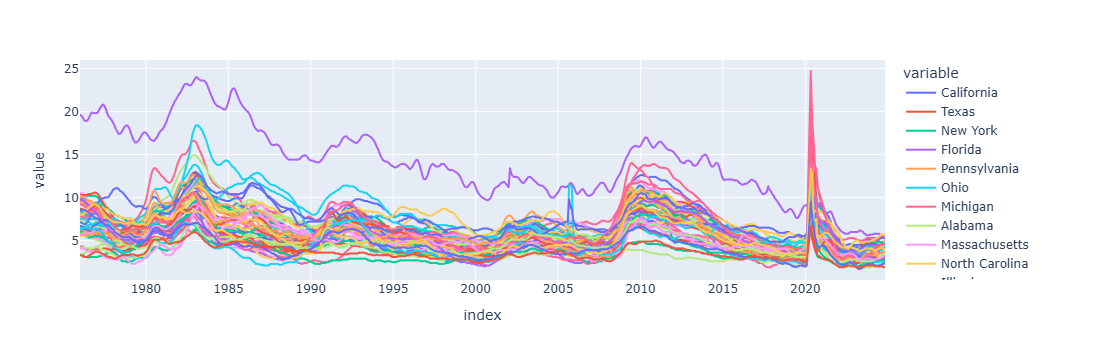

In [18]:
# Plot States Unemployment Rate
px.line(uemp_states)

# Pull May 2020 Unemployment Rate Per State

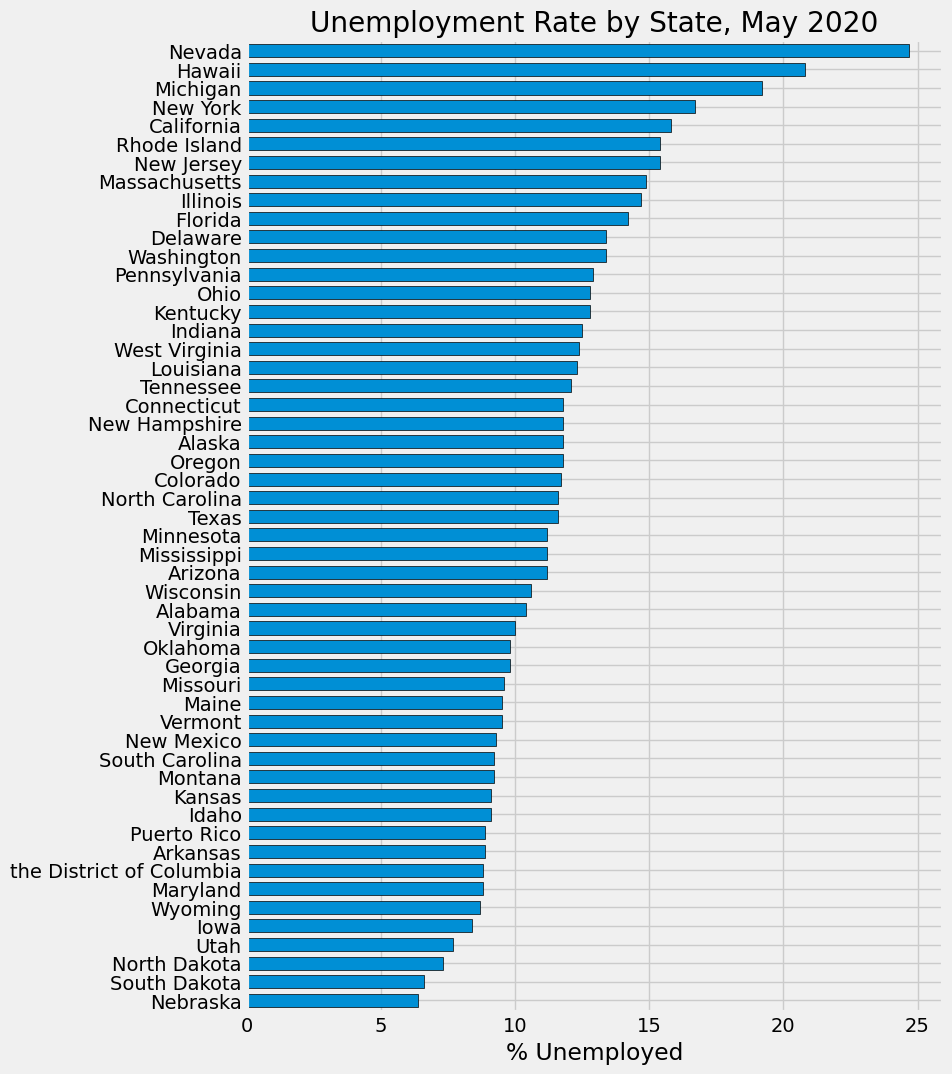

In [20]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pull Participation Rate

In [21]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [22]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Plot Unemployment vs Participation for each state!

In [23]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

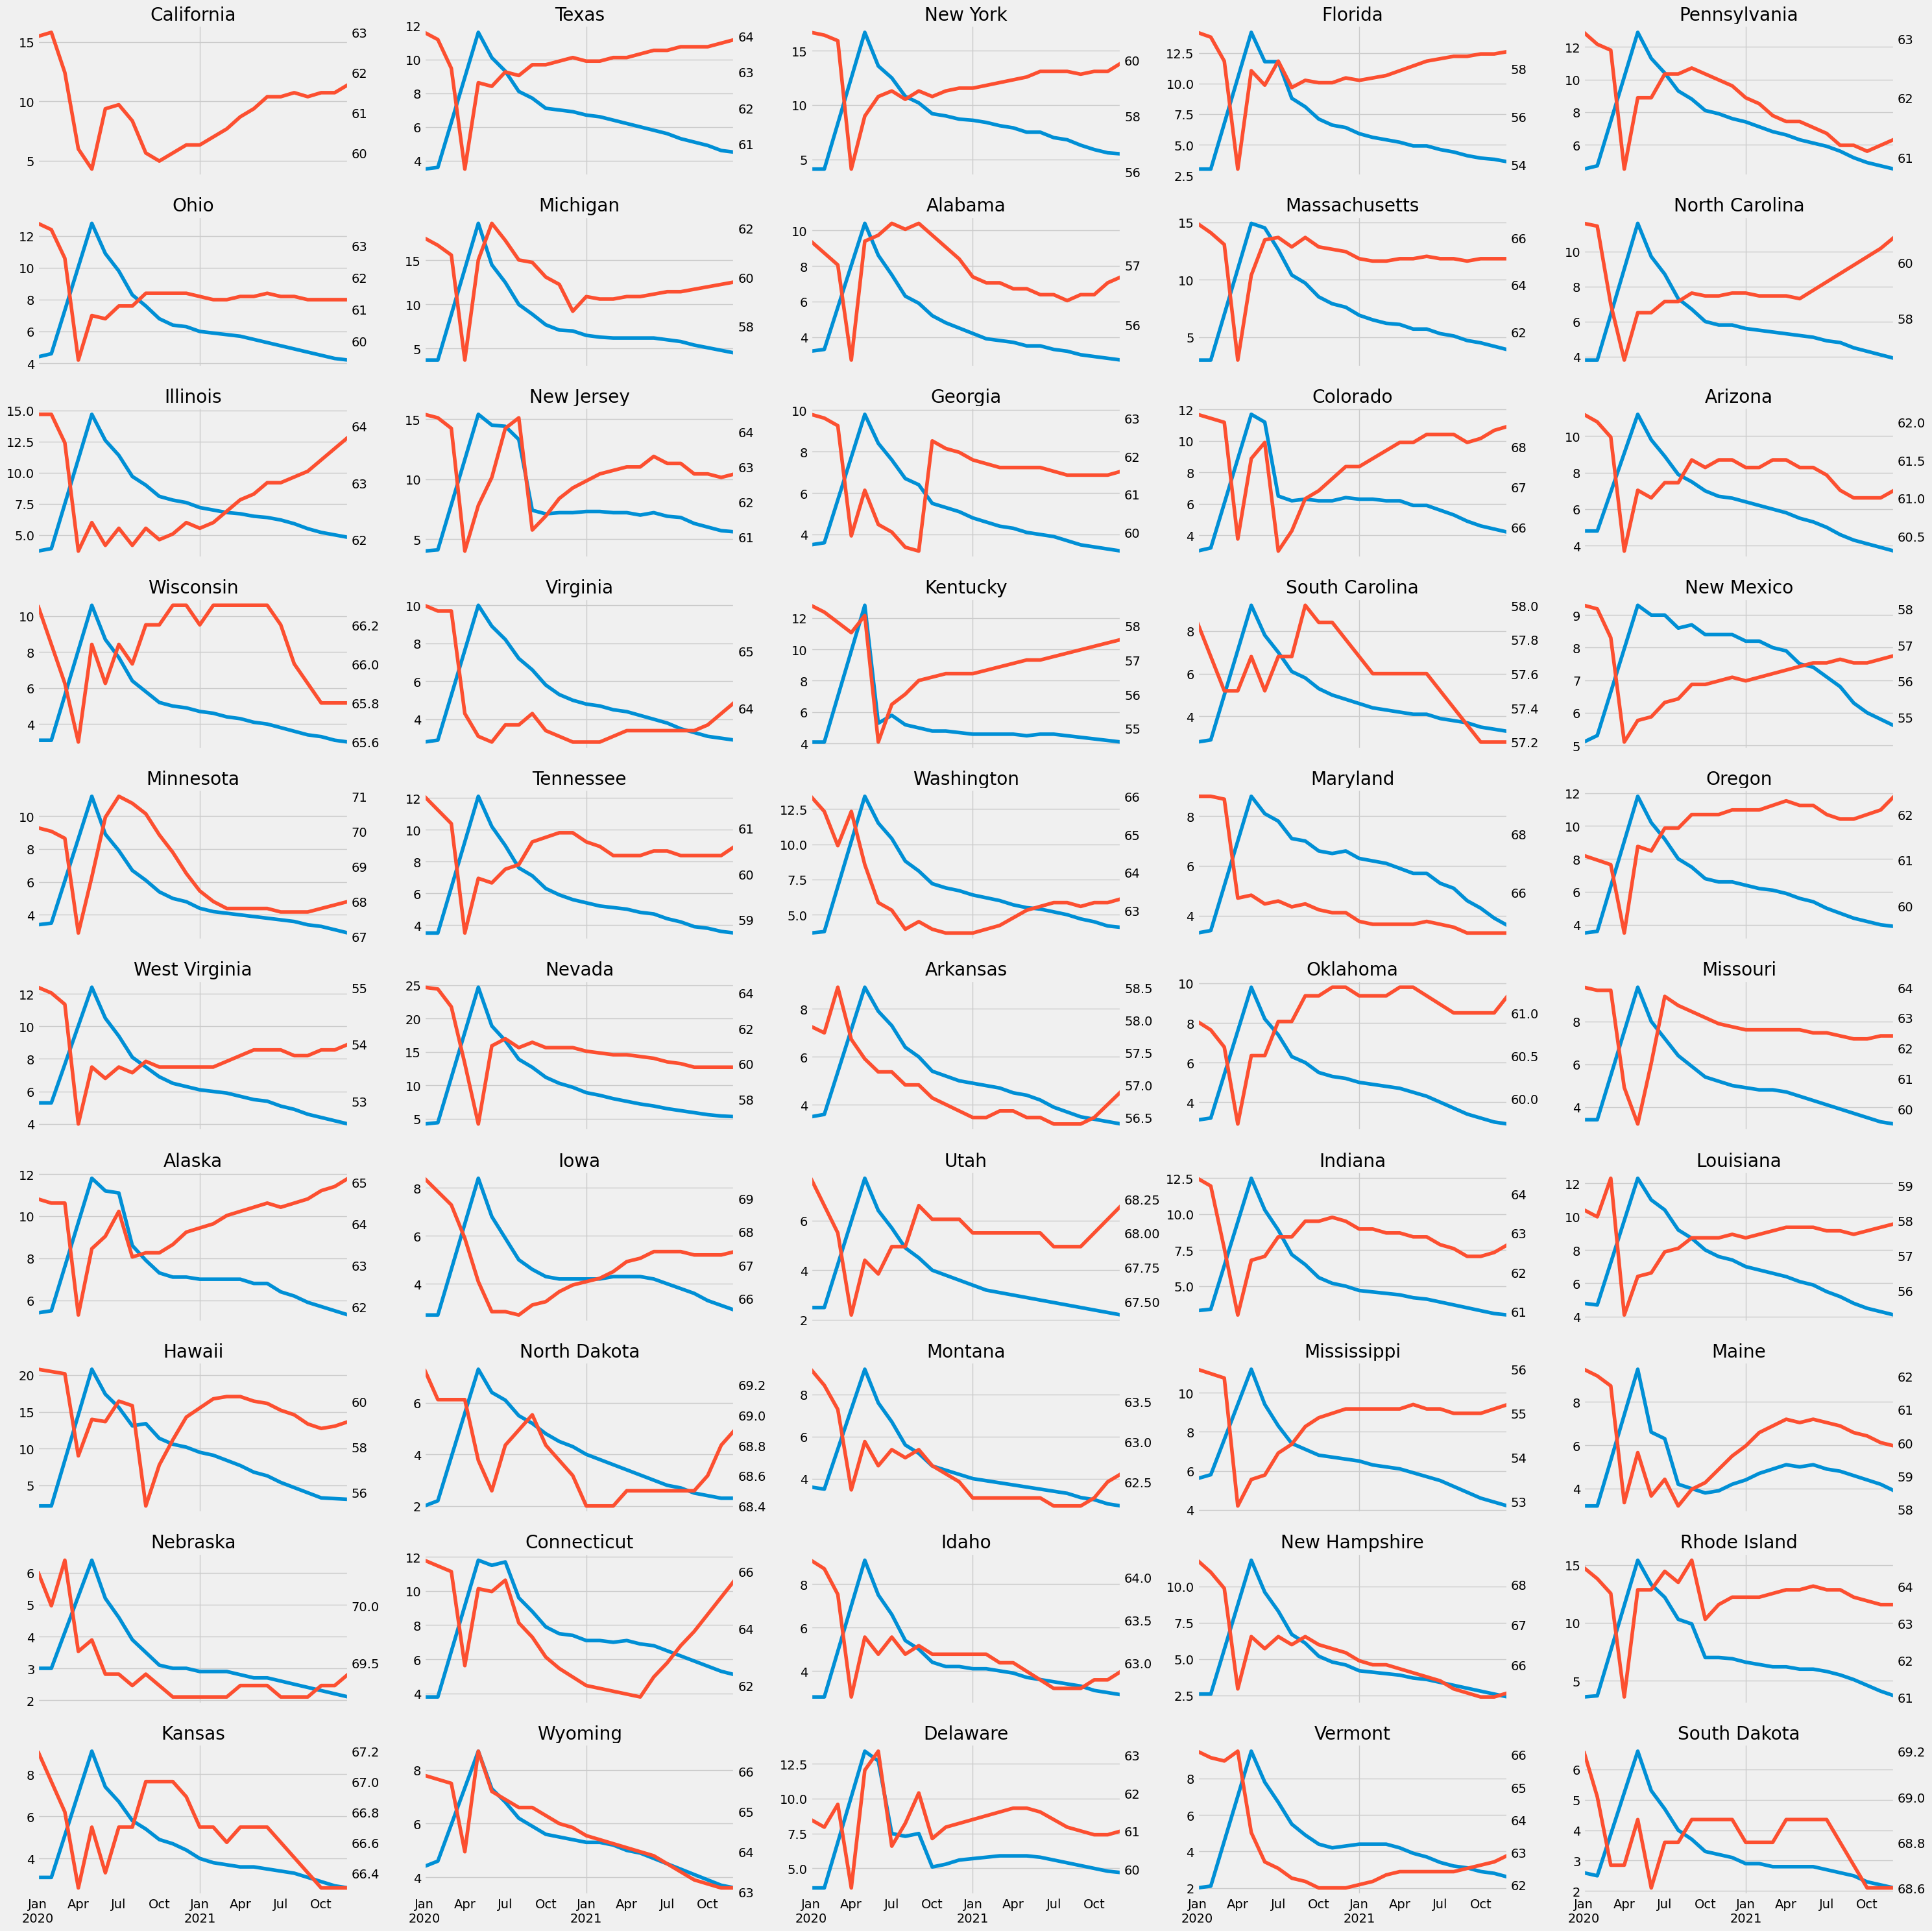

In [25]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

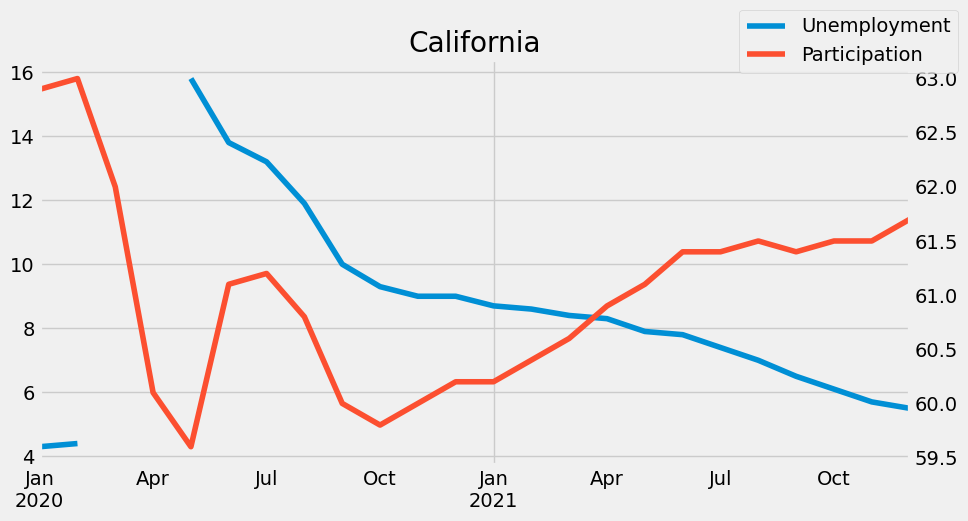

In [26]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()